In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('/content/Final_insurance_fraud.csv')
print(df.shape)
df.head()

(5061, 29)


,Claim_ID,Customer_Age,Claim_Amount,Claim_History,Policy_Type,Incident_Severity,Claim_Frequency,Fraud_Label,Claim_Description,Gender,...,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Driving Record,Life Events
0,C100000,58.0,20604.0,0.0,Auto,Severe,3.0,0.0,Enjoy four run family hundred number. Say mana...,Female,...,Phone,policy2,366603,2749,1604,Group,Email,In-Person Meeting,DUI,Job Change
1,C100001,71.0,17923.0,0.0,Auto,Moderate,3.0,0.0,Peace play attention he box information agree....,Male,...,Chat,policy1,780236,1966,1445,Group,Mail,In-Person Meeting,Clean,Retirement
2,C100002,48.0,48591.0,4.0,Health,Severe,9.0,0.0,Medical likely we course. Claim less from will...,Female,...,Email,policy3,773926,4413,1612,Group,Email,Mail,Accident,Childbirth
3,C100003,34.0,9547.0,2.0,Home,Severe,1.0,0.0,Improve bad experience exist.\nMove message be...,Male,...,Chat,policy2,787815,4342,1817,Family,Text,In-Person Meeting,DUI,Job Change
4,C100004,62.0,45283.0,1.0,Auto,Severe,7.0,0.0,Gun subject perhaps agency pretty. Food sing d...,Female,...,Chat,policy4,366506,1276,133,Family,Email,Text,Major Violations,Childbirth


##Data Visualization and Cleaning

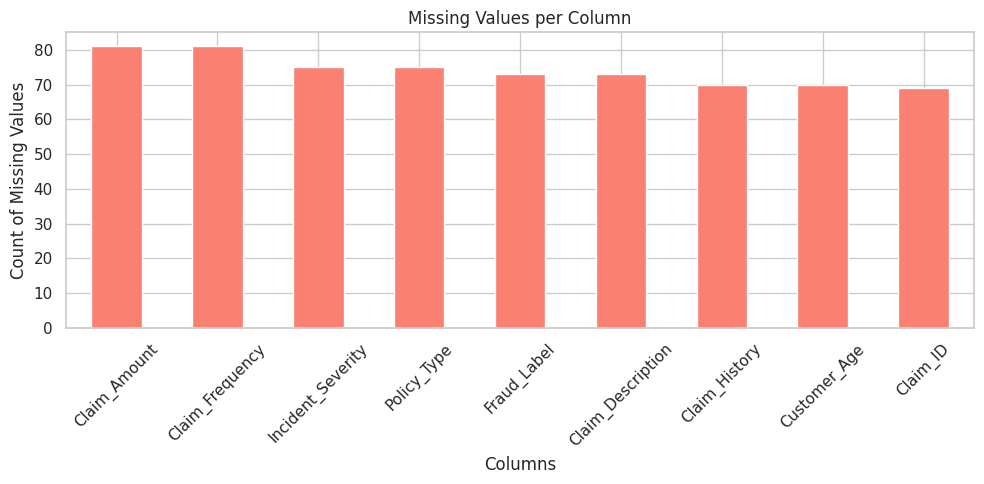

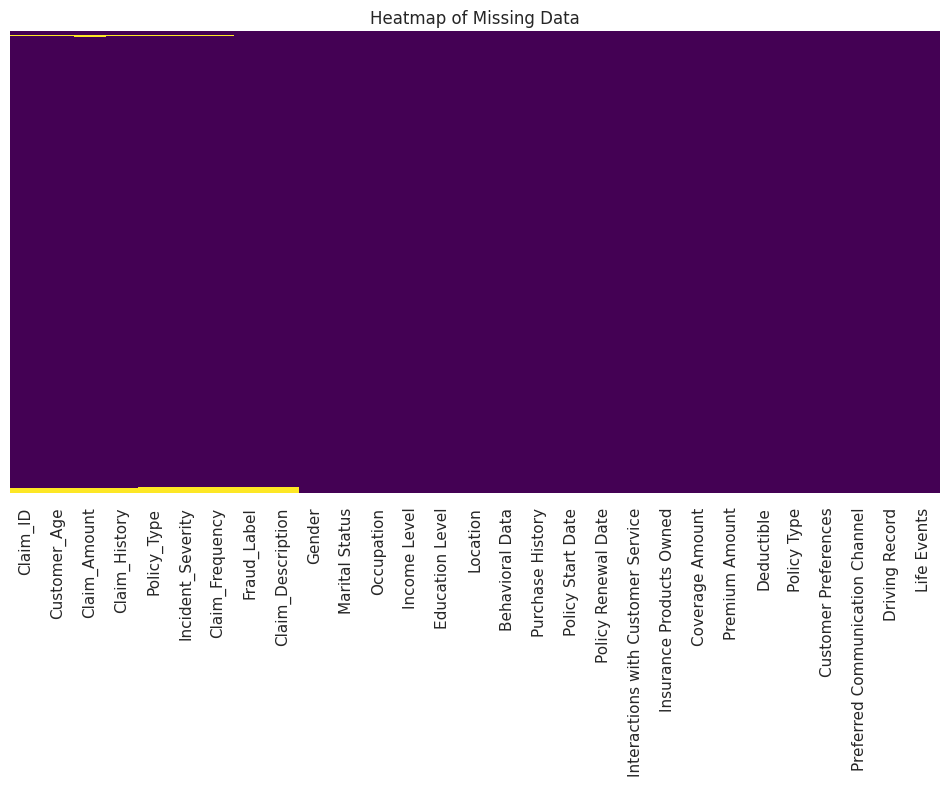

In [ ]:
sns.set(style="whitegrid")

# 1. Bar plot showing count of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(10, 5))
missing_counts.sort_values(ascending=False).plot(kind='bar', color='salmon')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.show()

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Claim_ID                              69
Customer_Age                          70
Claim_Amount                          81
Claim_History                         70
Policy_Type                           75
Incident_Severity                     75
Claim_Frequency                       81
Fraud_Label                           73
Claim_Description                     73
Gender                                 0
Marital Status                         0
Occupation                             0
Income Level                           0
Education Level                        0
Location                               0
Behavioral Data                        0
Purchase History                       0
Policy Start Date                      0
Policy Renewal Date                    0
Interactions with Customer Service     0
Insurance Products Owned               0
Coverage Amount                        0
Premium Amount                         0
Deductible                    

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Selected features
text_feature = 'Claim_Description'
numeric_features = [
    'Customer_Age', 'Claim_Amount', 'Claim_Frequency',
    'Coverage Amount', 'Premium Amount', 'Deductible',
    'Interactions with Customer Service'
]
categorical_features = [
    'Policy_Type', 'Incident_Severity', 'Occupation',
    'Education Level', 'Driving Record', 'Claim_History'
]

# Combine all features
X = df_cleaned[[text_feature] + numeric_features + categorical_features]
y = df_cleaned['Fraud_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(stop_words='english', max_features=1000), text_feature),
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Results
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


                                Column Data Type
0                             Claim_ID    object
1                         Customer_Age   float64
2                         Claim_Amount   float64
3                        Claim_History   float64
4                          Policy_Type    object
5                    Incident_Severity    object
6                      Claim_Frequency   float64
7                          Fraud_Label   float64
8                    Claim_Description    object
9                               Gender    object
10                      Marital Status    object
11                          Occupation    object
12                        Income Level     int64
13                     Education Level    object
14                            Location     int64
15                     Behavioral Data    object
16                    Purchase History    object
17                   Policy Start Date    object
18                 Policy Renewal Date    object
19  Interactions wit

<ipython-input-70-92ff060c9420>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_Label', data=df, palette='Set2')


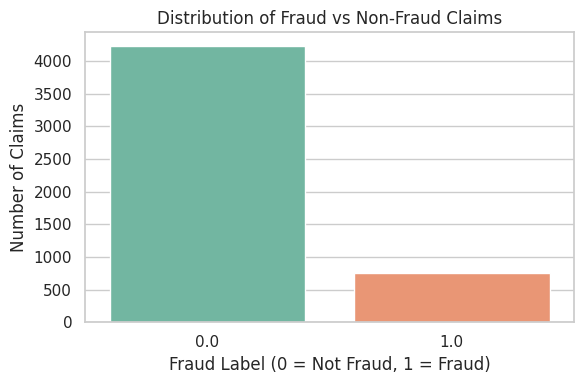

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_Label', data=df, palette='Set2')
plt.title('Distribution of Fraud vs Non-Fraud Claims')
plt.xlabel('Fraud Label (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Number of Claims')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned = df.dropna()

<ipython-input-72-839b0836be4a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_Label', data=df_cleaned, palette='Set2')


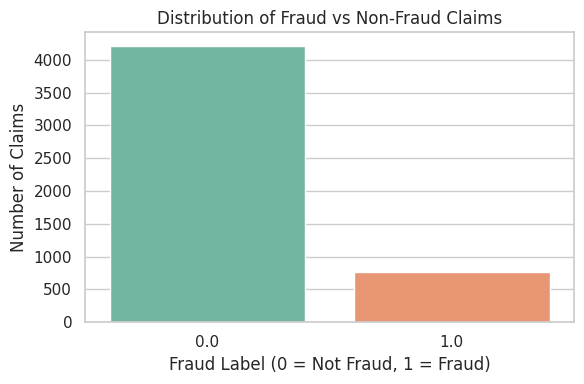

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Fraud_Label', data=df_cleaned, palette='Set2')
plt.title('Distribution of Fraud vs Non-Fraud Claims')
plt.xlabel('Fraud Label (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Number of Claims')
plt.xticks([0, 1])
plt.tight_layout()
plt.show()

In [ ]:
print(df_cleaned.shape)

(4968, 29)


##NLP based model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



# Step 1: Extract text features and labels
X = df_cleaned['Claim_Description']
y = df_cleaned['Fraud_Label']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Create the NLP classification pipeline
nlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000)),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Train the model
nlp_pipeline.fit(X_train, y_train)

#  Predict on test set
y_pred = nlp_pipeline.predict(X_test)

# Step 6: Evaluation
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1263
         1.0       1.00      1.00      1.00       228

    accuracy                           1.00      1491
   macro avg       1.00      1.00      1.00      1491
weighted avg       1.00      1.00      1.00      1491

Accuracy: 1.0


## NLP + Logistic regression (complete dataset , with imp features used)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
text_feature = 'Claim_Description'
numeric_features = ['Customer_Age', 'Claim_Amount', 'Claim_History',
                    'Claim_Frequency', 'Coverage Amount', 'Premium Amount', 'Deductible']
categorical_features = ['Policy_Type', 'Incident_Severity', 'Occupation']
target = 'Fraud_Label'

# Filter relevant columns and drop missing rows
required_cols = [text_feature] + numeric_features + categorical_features + [target]
df_model = df_cleaned[required_cols].dropna()

# Split features and target
X = df_model.drop(columns=[target])
y = df_model[target]

# Preprocessor
preprocessor = ColumnTransformer([
    ('text', TfidfVectorizer(stop_words='english', max_features=1000), 'Claim_Description'),
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(solver='liblinear'))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1263
         1.0       1.00      1.00      1.00       228

    accuracy                           1.00      1491
   macro avg       1.00      1.00      1.00      1491
weighted avg       1.00      1.00      1.00      1491

Accuracy: 1.0


In [ ]:
print("=== Label Distribution in Test Set ===")
print(y_test.value_counts())

=== Label Distribution in Test Set ===
Fraud_Label
0.0    1263
1.0     228
Name: count, dtype: int64


## NLP + Randomforest based model

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Define feature categories
numerical_features = [
    'Customer_Age', 'Claim_Amount', 'Claim_Frequency',
    'Coverage Amount', 'Premium Amount', 'Deductible'
]

categorical_features = [
    'Policy_Type', 'Incident_Severity', 'Gender', 'Marital Status',
    'Occupation', 'Income Level', 'Education Level', 'Location',
    'Behavioral Data', 'Purchase History', 'Customer Preferences',
    'Preferred Communication Channel', 'Driving Record', 'Life Events',
    'Insurance Products Owned', 'Claim_History'
]

text_feature = 'Claim_Description'

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('text', TfidfVectorizer(stop_words='english', max_features=1000), text_feature),
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Full pipeline
full_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define X and y
X = df_cleaned[[text_feature] + numerical_features + categorical_features]
y = df_cleaned['Fraud_Label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42)

# Train model
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1263
         1.0       1.00      1.00      1.00       228

    accuracy                           1.00      1491
   macro avg       1.00      1.00      1.00      1491
weighted avg       1.00      1.00      1.00      1491



In [ ]:
import numpy as np

# Get prediction probabilities
y_prob = full_pipeline.predict_proba(X_test)

# Flag claims with *any* uncertainty (excluding those with >99% or <1% confidence)
human_review_idx = np.where((y_prob[:, 1] > 0.02) & (y_prob[:, 1] < 0.80))[0]
print(f"Claims needing review (1%-99% fraud chance): {len(human_review_idx)}")

# Get those rows
claims_needing_review = X_test.iloc[human_review_idx]

# Generate summaries
def generate_summary(claim_row):
    return f"""Claim Summary:
    - Age: {claim_row['Customer_Age']}
    - Claim Amount: ${claim_row['Claim_Amount']}
    - Description: {claim_row['Claim_Description'][:100]}..."""

# Print summaries
for idx, row in claims_needing_review.iterrows():
    print(generate_summary(row))
    print("-" * 60)


In [ ]:
!pip install -q transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load tokenizer and model
model_id = "microsoft/phi-2"  # You can try mistralai/Mistral-7B-Instruct too, but it’s heavy.

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto"  # Use 'cpu' if no GPU available
)


tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def format_prompt(claim):
    return (
        f"Summarize the following insurance claim for human review:\n"
        f"Customer Age: {claim['Customer_Age']}, "
        f"Claim Amount: ${claim['Claim_Amount']}, "
        f"Policy Type: {claim['Policy_Type']}, "
        f"Incident Severity: {claim['Incident_Severity']}, "
        f"Occupation: {claim['Occupation']}, "
        f"Description: {claim['Claim_Description']}\n"
        f"Summary:"
    )


## Generate Summary for human intervention

In [ ]:
def generate_phi_summary(prompt):
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(**inputs, max_new_tokens=100, do_sample=True, top_p=0.9)
    return tokenizer.decode(outputs[0], skip_special_tokens=True).split("Summary:")[-1].strip()


In [ ]:
for i, (_, row) in enumerate(claims_needing_review.reset_index(drop=True).iterrows()):
    prompt = format_prompt(row)
    summary = generate_phi_summary(prompt)
    prob = y_prob[human_review_idx[i], 1] * 100  # Map correct probability
    print(f"🔥 Fraud Probability: {prob:.2f}%")
    print(summary)
    print("=" * 80)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🔥 Fraud Probability: 4.00%
A 25-year-old homeowner with a severe accident report and verified documentation for a bed chance claim filed for $48663.0. Their occupation is listed as a lawyer.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🔥 Fraud Probability: 4.00%
A 73-year-old doctor with a minor accident and only so remember feeling reported a minor accident with the help of documentation. The incident severity is minor, and the claim amount is $24816.0 with a health policy type. The claim was verified by the customer.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🔥 Fraud Probability: 3.00%
A 67-year-old female with a policy type of Health was involved in an accident and sustained injuries. The incident severity is described as moderate and the claimant is an engineer. The insurance claim has been accepted with a coverage amount of $1661.00.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🔥 Fraud Probability: 3.00%
- A 65-year-old nurse was involved in a moderate incident while on a food skill mission.
- The claim amount is $13126.00.
- The policy type is Home.
- The incident severity is Moderate.
- The incident report and documentation have been verified.


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


🔥 Fraud Probability: 3.00%
27-year-old salesperson with a health insurance policy. Claim amount of $1992.0 and incident severity of minor. Accident report and documentation verified.


KeyboardInterrupt: 

## Sending Emails to approved claims(these mails can be sent using the sending id and receivers id , if available, (Smtp) ,

In [ ]:
# Step 1: Auto-approval (fraud probability ≤ 2%)
auto_approved_idx = np.where(y_prob[:, 1] <= 0.02)[0]

# Step 2: Exclude human review cases
auto_approved_final_idx = list(set(auto_approved_idx) - set(human_review_idx))

# Step 3: Extract approved claims
auto_approved_claims = X_test.iloc[auto_approved_final_idx]


In [ ]:
def send_approval_email(row):
    return f"""
📨 Email to Customer:

Subject: Insurance Claim Approved ✅

Dear Valued Customer,

We are pleased to inform you that your insurance claim has been reviewed and approved.

🧾 Claim Summary:
- Customer Age: {row['Customer_Age']}
- Claim Amount: ${row['Claim_Amount']}
- Policy Type: {row.get('Policy_Type', 'N/A')}
- Incident Severity: {row.get('Incident_Severity', 'N/A')}
- Description: {row['Claim_Description'][:100]}...

No further action is required from your side.

Thank you for trusting us with your insurance needs.

Warm regards,
Claims Approval Team
"""

# Send email simulation
for _, row in auto_approved_claims.iterrows():
    print(send_approval_email(row))
    print("=" * 100)

Streaming output truncated to the last 5000 lines.
- Incident Severity: Moderate
- Description: Cost forget far raise. Laugh employee government scene knowledge. Several family get. Accident repor...

No further action is required from your side.

Thank you for trusting us with your insurance needs.

Warm regards,  
Claims Approval Team


📨 Email to Customer:

Subject: Insurance Claim Approved ✅

Dear Valued Customer,

We are pleased to inform you that your insurance claim has been reviewed and approved.

🧾 Claim Summary:
- Customer Age: 58.0
- Claim Amount: $33006.0
- Policy Type: Health
- Incident Severity: Minor
- Description: Budget other walk too newspaper side building. Attention performance resource toward benefit up actu...

No further action is required from your side.

Thank you for trusting us with your insurance needs.

Warm regards,  
Claims Approval Team


📨 Email to Customer:

Subject: Insurance Claim Approved ✅

Dear Valued Customer,

We are pleased to inform you that y